Hello and welcome to my project analyzing data on the most subscribed youtube channels. The dataset is from Kaggle. I will be using Python packages pandas, matplotlib, and seaborn to manipulate data and create visuals.

First, let's load the data specifying the data type for each column. This will make it easier to work with moving forward.

In [10]:
import pandas as pd
df=pd.read_csv('most_subscribed_youtube_channels.csv',
    dtype={'rank': 'int64',
        'Youtuber': 'str',
        'subscribers': 'int64',
        'video views':'int64',
        'video count':'int64',
        'category':'category',
        'started':'int64'},
        thousands=',')

print(df.head())
print(df.info())

   rank                    Youtuber  subscribers   video views  video count  \
0     1                    T-Series    222000000  198459090822        17317   
1     2              YouTube Movies    154000000             0            0   
2     3  Cocomelon - Nursery Rhymes    140000000  135481339848          786   
3     4                   SET India    139000000  125764252686        91271   
4     5                       Music    116000000             0            0   

           category  started  
0             Music     2006  
1  Film & Animation     2015  
2         Education     2006  
3             Shows     2006  
4               NaN     2013  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   rank         1000 non-null   int64   
 1   Youtuber     1000 non-null   object  
 2   subscribers  1000 non-null   int64   
 3   video views  1

We can already see above that there are nulls and zero values where we should have non-zero values. Let's loop through the columns to count those up.

In [11]:
column_names=list(df.columns.values)

for item in column_names:
    print(item, 'nulls:', df[item].isna().sum())
    print(item, 'zeroes:', df[item].isin([0]).sum())

rank nulls: 0
rank zeroes: 0
Youtuber nulls: 0
Youtuber zeroes: 0
subscribers nulls: 0
subscribers zeroes: 0
video views nulls: 0
video views zeroes: 10
video count nulls: 0
video count zeroes: 10
category nulls: 27
category zeroes: 0
started nulls: 0
started zeroes: 0


I will create a dataframe that contains all of the items that have either a null in the category column, or a zero in the video views or video count columns.

In [14]:
dropping=(df['category'].isna()) | (df['video views'] == 0) | (df['video count'] == 0)
print(df[dropping])
print("There are", len(df[dropping]), "rows with insufficient data")

     rank                                           Youtuber  subscribers  \
1       2                                     YouTube Movies    154000000   
4       5                                              Music    116000000   
9      10                                             Gaming     92700000   
15     16                                             Sports     75100000   
81     82                                               News     36200000   
137   138                                 Popular on YouTube     29400000   
163   164                                     Vlad và Nikita     27100000   
180   181                                    व्लाद और निकिता     25900000   
202   203           Super JoJo - Nursery Rhymes & Kids Songs     24400000   
260   261                                 Diana and Roma ARA     21600000   
293   294                                         D Billions     20200000   
316   317                               Vlad and Niki Arabic     19600000   

29 rows of insufficient data accounts for only 2% of our total data, so we can drop these values to simplify things. 

In [15]:
df=df.drop(df[dropping].index)

for item in column_names:
    print(item, 'nulls:', df[item].isna().sum())
    print(item, 'zeroes:', df[item].isin([0]).sum())
    
print(df.shape)

rank nulls: 0
rank zeroes: 0
Youtuber nulls: 0
Youtuber zeroes: 0
subscribers nulls: 0
subscribers zeroes: 0
video views nulls: 0
video views zeroes: 0
video count nulls: 0
video count zeroes: 0
category nulls: 0
category zeroes: 0
started nulls: 0
started zeroes: 0
(971, 7)


Now we can start some EDA. First, I will make a new dataframe that contains the numerical data. Let's check this out with the describe method.

In [16]:
numdata=df[['subscribers','video views', 'video count', 'started']]
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(numdata.describe())

        subscribers      video views  video count  started
count       971.000          971.000      971.000  971.000
mean   20237693.100   9325895760.039     8794.881 2012.271
std    14791162.743  12189338559.382    29761.057    3.972
min    10900000.000       439098.000        1.000 1970.000
25%    12700000.000   3640473480.000      348.500 2009.000
50%    15500000.000   6165983944.000      908.000 2013.000
75%    22000000.000  11510382986.500     3160.500 2015.000
max   222000000.000 198459090822.000   329711.000 2021.000


Hmmmm.. I see we have a channel that claims to have started in 1970, but Youtube was launched in 2005! Let's do some visualization with seaborn to check out the outliers in the dataset.

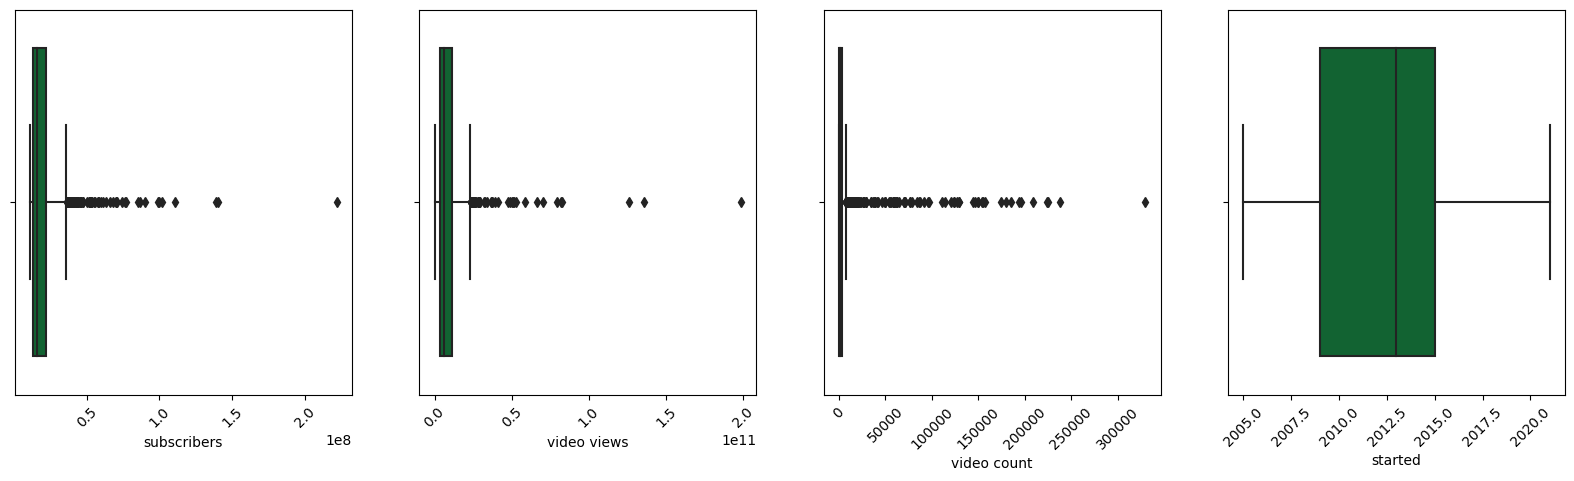

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('BuGn_r')

fig, axs = plt.subplots(1,4,figsize=(20, 5))

sns.boxplot(x=df['subscribers'],  data=df, ax=axs[0])
sns.boxplot(x=df['video views'],  data=df, ax=axs[1])
sns.boxplot(x=df['video count'],  data=df, ax=axs[2])
sns.boxplot(x=df['started'],  data=df, ax=axs[3])

for ax in axs.flatten():
    plt.sca(ax)
    plt.xticks(rotation = 45)

plt.show()

From this visualization, we can see there there are a good deal of outliers. 
Since it is incorrect data, let's change that channel started in 1970 to 2005, the year Youtube launched.

In [67]:
df['started']=df['started'].replace(1970, 2005)
print(df.describe())

          rank   subscribers      video views  video count  started
count  971.000       971.000          971.000      971.000  971.000
mean   500.896  20237693.100   9325895760.039     8794.881 2012.307
std    287.080  14791162.743  12189338559.382    29761.057    3.740
min      1.000  10900000.000       439098.000        1.000 2005.000
25%    252.500  12700000.000   3640473480.000      348.500 2009.000
50%    501.000  15500000.000   6165983944.000      908.000 2013.000
75%    747.500  22000000.000  11510382986.500     3160.500 2015.000
max   1000.000 222000000.000 198459090822.000   329711.000 2021.000


Now, let's group the data by category.

In [155]:
categorydf = df.groupby('category').size().sort_values(ascending=False).reset_index(name='count')
print(categorydf)

                 category  count
0           Entertainment    241
1                   Music    222
2          People & Blogs    119
3                  Gaming    102
4                  Comedy     63
5        Film & Animation     50
6               Education     46
7           Howto & Style     45
8         News & Politics     27
9    Science & Technology     18
10                  Shows     14
11                 Sports     10
12         Pets & Animals      6
13               Trailers      2
14                 Movies      2
15  Nonprofits & Activism      2
16       Autos & Vehicles      1
17        Travel & Events      1


Let's look at a visualization of the top 10 categories present in our data

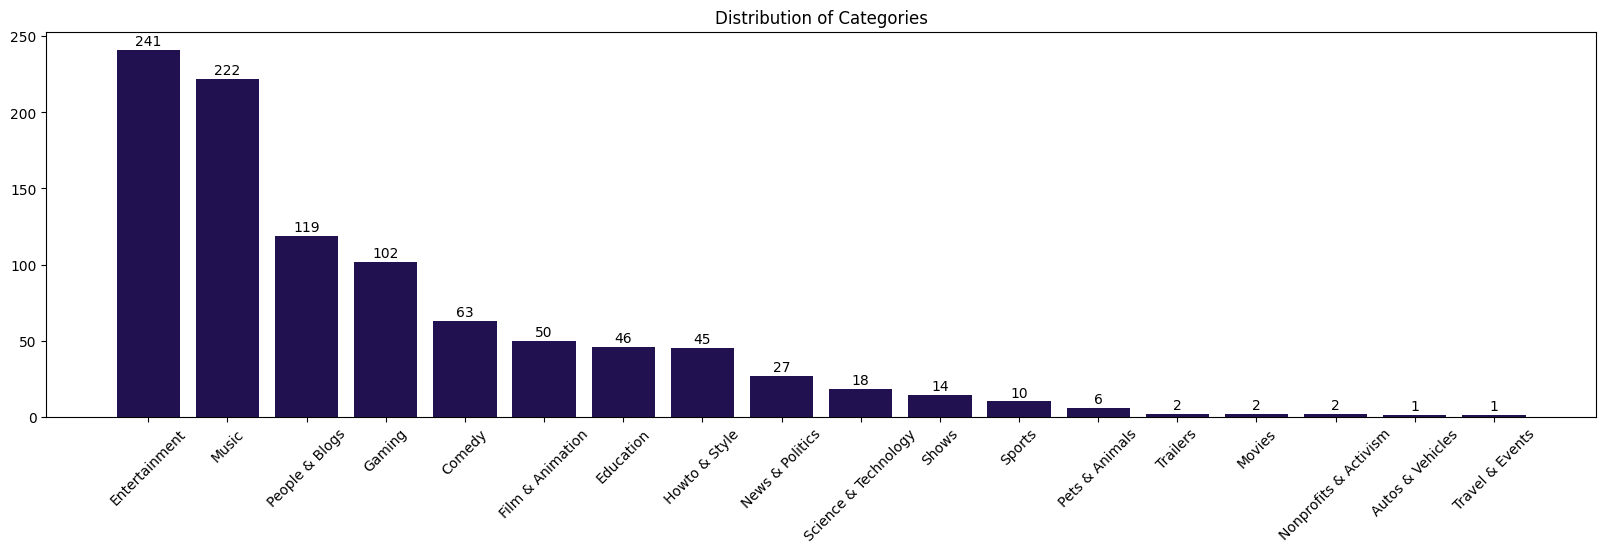

In [179]:
sns.set_palette('magma')

x=categorydf['category']
y=categorydf['count']

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+3, y[i], ha = 'center')

plt.figure(figsize=(20, 5))
plt.xticks(rotation=45)
plt.bar(x,y)
plt.title('Distribution of Categories')
addlabels(x,y)

plt.show()